In [6]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt
from dateutil.parser import parse
import seaborn as sns
import num2words
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Hashtag

Here there are just the top 5 hashtags but the chart can be extended with more hashtags.

In [ ]:
index=0
l = []
date = []
month = []
covid_hashtags = ["covid19","coronavirus","china","stayhome","lockdown"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        token_covid=entity['text'].lower()
        if token_covid in covid_hashtags:
            l.append(token_covid)
            token=data[index]['created_at']
            d = parse(token)
            #d1 = parse(token)
            d = d.strftime('%Y/%m/%d')
            date.append(d)
            #month.append(d1.strftime('%B'))
        
    index=index+1
    
df = pd.DataFrame(
    {'Date': date,
    'Hashtag': l
     #'Month': month
    })
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
#http://alanpryorjr.com/visualizations/seaborn/stripplot/stripplot/


plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Hashtag", data=df, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Hashtag",fontsize=20)


## Mentions

In [ ]:
index_mentions=0
date_mention = []
mentions = []
mentions_list = ["realDonaldTrump","JoeBiden","narendramodi","WHO","CNN"]
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        #print(token_mentions)
        if token_mentions in mentions_list:
            #print("in")
            mentions.append(token_mentions)
            token=data[index_mentions]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            date_mention.append(d)
            
    index_mentions=index_mentions+1
    
    
df_mentions = pd.DataFrame(
    {'Date': date_mention,
    'Mentions': mentions
    })

df_mentions['Date']= pd.to_datetime(df_mentions['Date'])


In [ ]:
plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Mentions", data=df_mentions, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Mentions",fontsize=20)


## Emoji

In [ ]:
import demoji
import itertools 

date_emoji = []
index= 0
emos = []
emoji_list = ["😂","😭","🤣","🙏","❤️"]
for element in data:
    em = demoji.findall_list(data[index]['full_text'], False)
    for e in em:
        if e in emoji_list:
            emos.append(e)
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            date_emoji.append(d)
    index= index+1
    
#merged=list(itertools.chain.from_iterable(emos))
    
    
df_em = pd.DataFrame(
    {'Date': date_emoji,
    'Emoji': emos
    })

df_em['Date']= pd.to_datetime(df_em['Date'])

In [ ]:

plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Emoji", data=df_em, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Emoji",fontsize=20)

## Text

Not the top 5 words from the bar chart but 5 words that make sense for the purpose of the chart

In [4]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In [ ]:

word_list = ["cases","coronavirus","lockdown","china","pandemic"]
wlist = []
index=0
dates = []
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                   # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])      # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                    # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])     # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])     # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])      # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])    # Remove big spaces

    
    tokens=data[index]['full_text'].split()
    for t in tokens:
        if t in word_list:
            wlist.append(t)
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            dates.append(d)

    index=index+1
    
    
df_text = pd.DataFrame(
    {'Date': dates,
    'Words': wlist
    })

df_text['Date']= pd.to_datetime(df_text['Date'])

In [ ]:

plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Words", data=df_text, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Words",fontsize=20)

## Bigrams

In [ ]:
from nltk.corpus import stopwords
import contractions

index=0
stop_words = stopwords.words('english')
listab = [("social", "distancing"),("stay", "home"), ("tested", "positive"), ("corona", "virus"), ("coronavirus", "cases")]
new_bigram=[]
datesb = []
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                              # Put everything in lowercase
    data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])                # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                               # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])                # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])                # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode()   # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])                 # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])               # Remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    for c in clean_bigram_tokens:
        if c in listab:
            new_bigram.append(c[0]+" "+c[1])
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            datesb.append(d)
    index=index+1
    
    
df_bi = pd.DataFrame(
    {'Date': datesb,
    'Bigrams': new_bigram
    })

df_bi['Date']= pd.to_datetime(df_bi['Date'])



In [ ]:
plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Bigrams", data=df_bi, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Bigrams",fontsize=20)

## Trigrams - da finire

In [9]:
from nltk.corpus import stopwords
import contractions

index_tri=0
stop_words_tri = stopwords.words('english')
listat = [("new", "coronavirus", "cases"),("black", "lives", "matter"), ("let", "us", "see"), ("last", "24", "hours"), ("coronavirus", "death", "toll")]
new_trigram=[]
datest=[]
for element in data:
    data[index_tri]['full_text'] = data[index_tri]['full_text'].lower()                   # Put everything in lowercase
    data[index_tri]['full_text'] = contractions.fix(data[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])     # Remove everything after '
    data[index_tri]['full_text'] = remove_urls(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_twitter_urls(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_emoticons(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_emoji(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = give_emoji_free_text(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = noamp(data[index_tri]['full_text'])                    # No amp with space
    data[index_tri]['full_text'] = re.sub("#\S+", " ",  data[index_tri]['full_text'])     # Remove hashtags
    data[index_tri]['full_text'] = re.sub("@\S+", " ",  data[index_tri]['full_text'])     # No mentions
    data[index_tri]['full_text'] = data[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index_tri]['full_text'] = data[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index_tri]['full_text'] = re.sub("^rt ", " ", data[index_tri]['full_text'])      # No RT
    data[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data[index_tri]['full_text'])
    data[index_tri]['full_text'] = re.sub('\s{2,}', " ", data[index_tri]['full_text'])    # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        if c in listat:
            new_trigram.append(c[0]+" "+c[1]+" "+c[2])
            token=data[index_tri]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            datest.append(d)
            
    index_tri=index_tri+1

df_tri = pd.DataFrame(
    {'Date': datest,
    'Trigrams': new_trigram
    })

df_tri['Date']= pd.to_datetime(df_tri['Date'])




Text(0, 0.5, 'Trigrams')

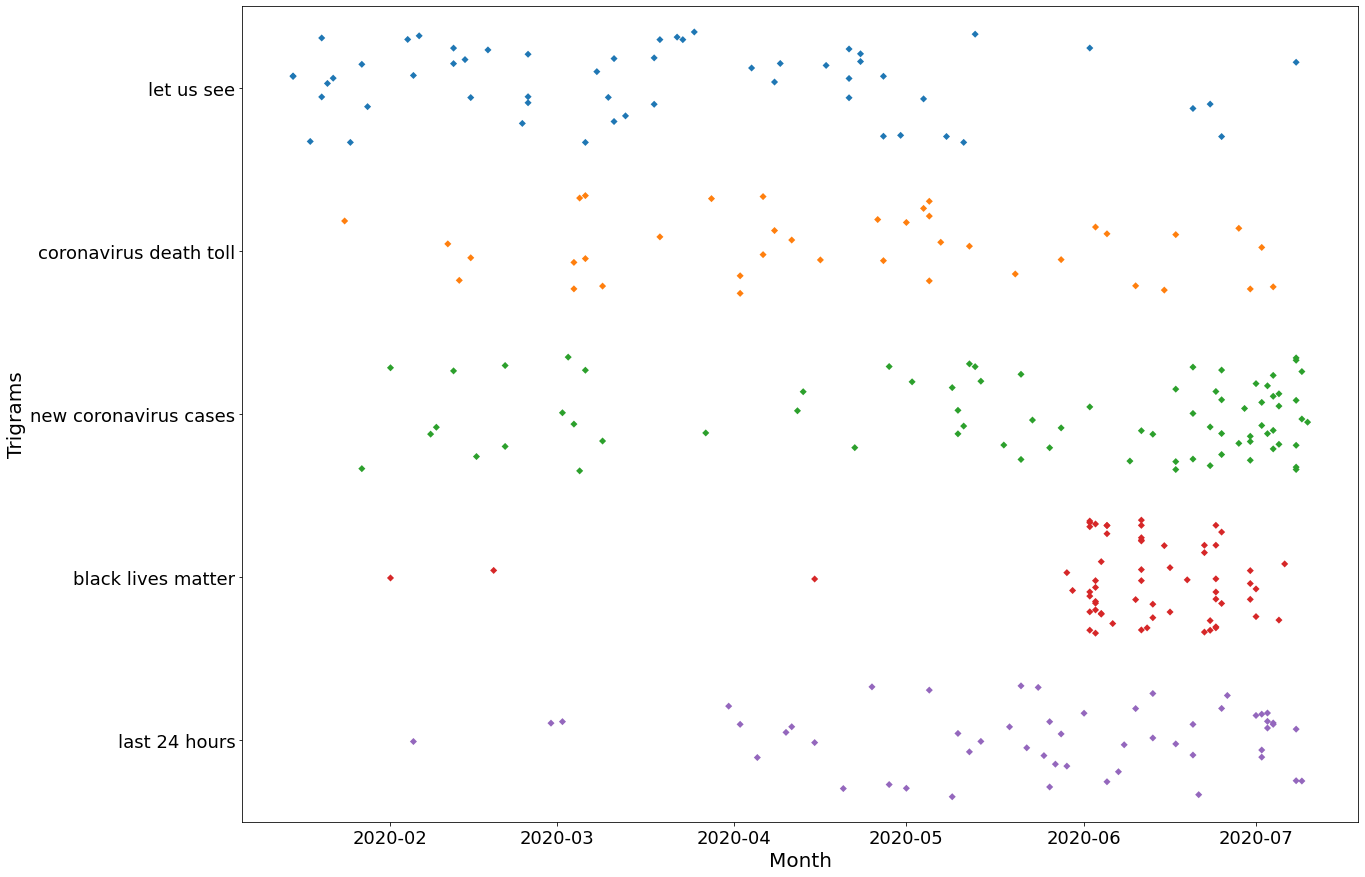

In [10]:
plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Trigrams", data=df_tri, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month",fontsize=20)
plt.ylabel("Trigrams",fontsize=20)